In [2]:
pip install ucimlrepo

In [3]:
from ucimlrepo import fetch_ucirepo
# fetch dataset
iris = fetch_ucirepo(id=53)
X = iris.data.features
y = iris.data.targets
print(iris.metadata)
print(iris.variables)


{'uci_id': 53, 'name': 'Iris', 'repository_url': 'https://archive.ics.uci.edu/dataset/53/iris', 'data_url': 'https://archive.ics.uci.edu/static/public/53/data.csv', 'abstract': 'A small classic dataset from Fisher, 1936. One of the earliest known datasets used for evaluating classification methods.\n', 'area': 'Biology', 'tasks': ['Classification'], 'characteristics': ['Tabular'], 'num_instances': 150, 'num_features': 4, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1936, 'last_updated': 'Tue Sep 12 2023', 'dataset_doi': '10.24432/C56C76', 'creators': ['R. A. Fisher'], 'intro_paper': {'ID': 191, 'type': 'NATIVE', 'title': 'The Iris data set: In search of the source of virginica', 'authors': 'A. Unwin, K. Kleinman', 'venue': 'Significance, 2021', 'year': 2021, 'journal': 'Significance, 2021', 'DOI': '1740-9713.01589', 'URL': 'https://www.semanticscholar.org

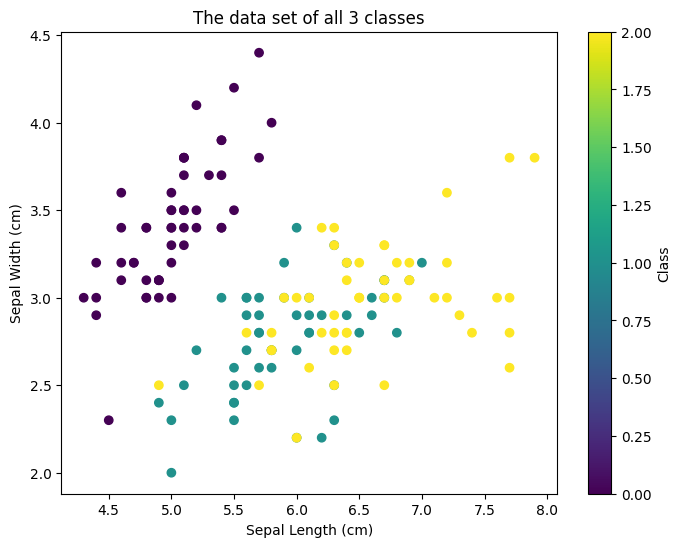

In [8]:
import matplotlib.pyplot as plt
from ucimlrepo import fetch_ucirepo
from sklearn.preprocessing import LabelEncoder

sepal_length = X['sepal length']
sepal_width = X['sepal width']

# Convert string labels to numerical values
le = LabelEncoder()
y_encoded = le.fit_transform(y['class'])

# Create the scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(sepal_length, sepal_width, c=y_encoded, cmap='viridis')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title('The data set of all 3 classes')
plt.colorbar(label='Class')
plt.show()

Data prepare

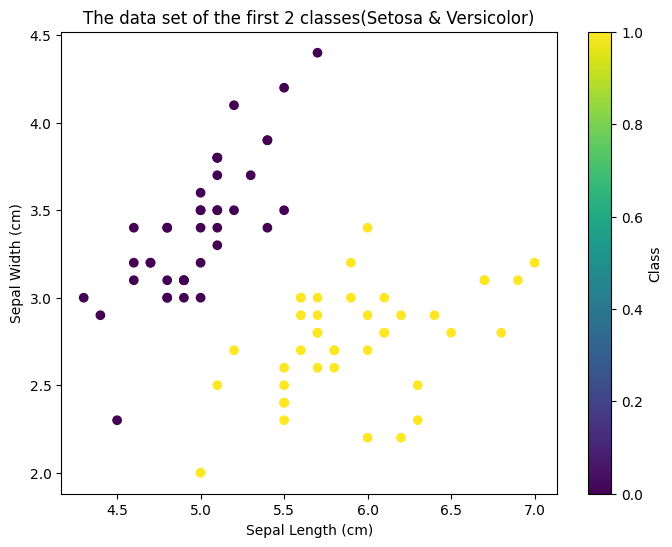

In [9]:
import matplotlib.pyplot as plt
from ucimlrepo import fetch_ucirepo
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Filter for Setosa and Versicolor
setosa_versicolor_indices = y['class'].isin(['Iris-setosa', 'Iris-versicolor'])
X_binary = X[setosa_versicolor_indices]
y_binary = y['class'][setosa_versicolor_indices]


sepal_length = X_binary['sepal length']
sepal_width = X_binary['sepal width']

# Convert string labels to numerical values (0 and 1)
le = LabelEncoder()
y_encoded = le.fit_transform(y_binary)


# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X_binary[['sepal length', 'sepal width']], y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

# Create the scatter plot for the binary classification data
plt.figure(figsize=(8, 6))
plt.scatter(X_train['sepal length'], X_train['sepal width'], c=y_train, cmap='viridis')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title('The data set of the first 2 classes(Setosa & Versicolor)')
plt.colorbar(label='Class')
plt.show()



Implementing the Perceptron

In [6]:
import numpy as np

class Perceptron:
    def __init__(self, learning_rate=0.1, n_iters=100):
        self.lr = learning_rate
        self.n_iters = n_iters
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0
        y_ = np.where(y >=1, 1, -1) #Convert to bipolar {-1, 1}
        for _ in range(self.n_iters):
            for idx, x_i in enumerate(X):
                linear_output = np.dot(x_i, self.weights) + self.bias
                y_predicted = np.where(linear_output>=0, 1, -1)
                update = self.lr * (y_[idx] - y_predicted)
                self.weights += update * x_i
                self.bias += update

    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        y_predicted = np.where(linear_output >= 0, 1, 0) #Convert back to {0,1}
        return y_predicted


Training and Evaluation

In [7]:
# Train the perceptron
perceptron = Perceptron(learning_rate=0.01, n_iters=1000)
perceptron.fit(X_train.values, y_train)

# Make predictions on the test set
y_pred = perceptron.predict(X_test.values)

# Calculate the accuracy
accuracy = np.mean(y_pred == y_test)
print(f"Test Accuracy: {accuracy}")

#Calculate training error
y_train_pred = perceptron.predict(X_train.values)
training_accuracy = np.mean(y_train_pred == y_train)
print(f"Training Accuracy: {training_accuracy}")

Test Accuracy: 0.95
Training Accuracy: 1.0
